# NADILA IMAARAH 3323600015 SDT A

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. MENAMPILKAN DATA SET 

In [4]:
df = pd.read_csv("transaction.csv")
df.head()

,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,12/7/2010 14:57,12347,Iceland
1,537626,22729,948,12/7/2010 14:57,12347,Iceland
2,537626,22195,695,12/7/2010 14:57,12347,Iceland
3,542237,22725,636,1/26/2011 14:30,12347,Iceland
4,542237,22729,536,1/26/2011 14:30,12347,Iceland


In [5]:
# Cek tipe data setiap kolom
print(df.dtypes)


InvoiceNo       int64
StockCode       int64
Qty             int64
InvoiceDate    object
CustomerID      int64
Country        object
dtype: object


# 2. AMBIL FITUR QT,COUNTRY (GERMANY), MONTH, YESR (2011)

In [6]:
# Pastikan kolom tanggal dalam format datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Tambahkan kolom bulan dan tahun
df['month'] = df['InvoiceDate'].dt.month
df['year'] = df['InvoiceDate'].dt.year

data = df[(df['Country'] == 'Germany') & (df['year'] == 2011)][['Qty', 'Country', 'month', 'year']]
data.head()

,Qty,Country,month,year
1185,628,Germany,5,2011
1186,981,Germany,5,2011
1187,212,Germany,5,2011
1188,910,Germany,5,2011
1189,668,Germany,5,2011


**ANALISIS**
pertama rubah type data fitur InvoiceDaeta menjadi datetime agar bisa mengambil informasi bulan dan tahun

 setelah itu mengambil nilai bulan dan tahundari InvoiceDate yang telah dirubah typedatanya

 setelah itu dilakukan filter agar data yang ditampilkan hanya data yang country nya itu jerman saja yang terjadi di tahun 2011

In [10]:
print(df.dtypes)

InvoiceNo               int64
StockCode               int64
Qty                     int64
InvoiceDate    datetime64[ns]
CustomerID              int64
Country                object
month                   int32
year                    int32
dtype: object


**ANALISIS**



# 3. AMBIL MONTH DARI DATA DAN AKUMULASI QTY PADA BULAN YANG SAMA

In [7]:
# Akumulasi Qty per bulan
TotalQty = data.groupby('month')['Qty'].sum().reset_index()
TotalQty.columns = ['month', 'TotalQty']
TotalQty

,month,TotalQty
0,1,101266
1,2,37800
2,3,72084
3,4,60993
4,5,103749
5,6,79711
6,7,96423
7,8,120908
8,9,104487
9,10,159490


Melakukan groupby dulu berdasarkan month setelah itu menjumlahkan nilai qty berdasarkan bulan yang sama

# 4. VISUALISASI PERGERAKAN NILAI TotalQty

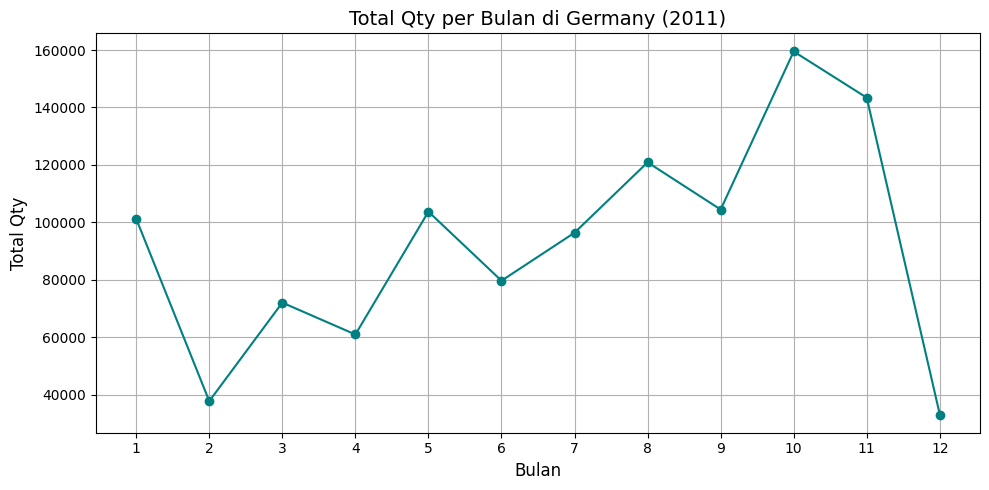

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(TotalQty['month'], TotalQty['TotalQty'], marker='o', linestyle='-', color='teal')
plt.title('Total Qty per Bulan di Germany (2011)', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Qty', fontsize=12)
plt.xticks(TotalQty['month'])  
plt.grid(True)
plt.tight_layout()
plt.show()


# 5. PREDIKSI TOTAL QTY dari TotalQty PADA BULAN JANUARI 2012 DENGAN LINIER REGRESSION


Prediksi Total Qty untuk Januari 2012: 117751.76


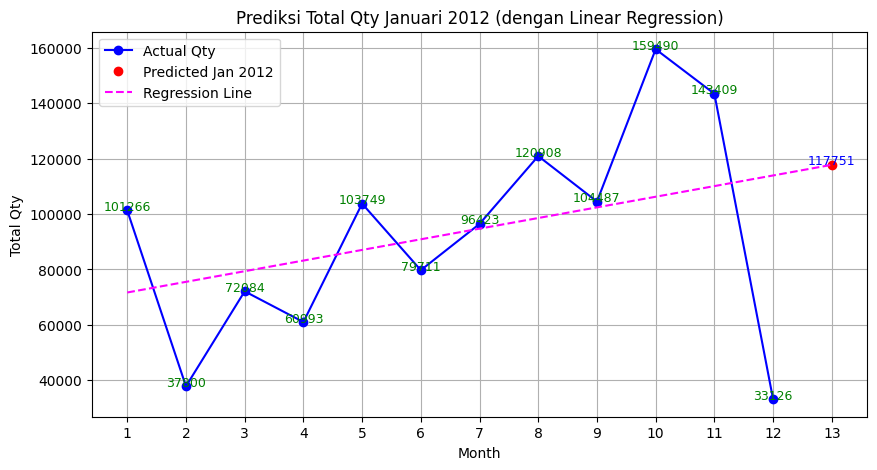

In [9]:
X = TotalQty['month'].values.reshape(-1, 1)
y = TotalQty['TotalQty'].values
model = LinearRegression()
model.fit(X, y)

# Prediksi bulan ke-13 (Januari 2012)
january_2012 = np.array([[13]])
predicted_qty = model.predict(january_2012)[0]
print(f"\nPrediksi Total Qty untuk Januari 2012: {predicted_qty:.2f}")

# Menyiapkan data untuk visualisasi regresi
all_months = np.append(TotalQty['month'].values, 13).reshape(-1, 1)
predicted_line = model.predict(all_months)

# Visualisasi hasil prediksi + garis regresi
plt.figure(figsize=(10, 5))
plt.plot(TotalQty['month'], TotalQty['TotalQty'], marker='o', label='Actual Qty', color='blue')
for x, y in zip(TotalQty['month'], TotalQty['TotalQty']):
    plt.text(x, y + 10, str(int(y)), ha='center', fontsize=9, color='green')

plt.plot(13, predicted_qty, 'ro', label='Predicted Jan 2012')  # Titik prediksi
plt.text(13, predicted_qty + 10, f'{int(predicted_qty)}', ha='center', fontsize=9, color='blue')

plt.plot(all_months, predicted_line, linestyle='--', color='magenta', label='Regression Line')  # Garis regresi
plt.title('Prediksi Total Qty Januari 2012 (dengan Linear Regression)')
plt.xlabel('Month')
plt.ylabel('Total Qty')
plt.xticks(list(range(1, 14)))  
plt.legend()
plt.grid(True)
plt.show()

**ANALISIS**

disini saya memprediksi dengan metode linier regresi pertama merubah data dari array menjadi kolom karena linir regression butuh input berupa 2d sepeeti kolom,kemudian kolom targetnya yakni TotalQty. setelah itu baru melatih model kemudian melakukan prediksi bulan ke 13 yang arti bulan januari di tahun 2012. Garis magenta ini menunjuukkan garis yang di bentuk dari linier regressi yang menunjukkan garis prediksi rata-rata , semakin dekat data asli dengan garis magenta maka menunjukkan bahwa modelnya bagus, garis magenta ini menggambarakan hubungan linier antara bulan dan totalqty